In [1]:
# import package
import matplotlib.pyplot as plt
from tqdm import tqdm
import numpy as np
import pandas as pd
import skimage

import os
#from os import listdir
#from os.path import isfile, isdir, join
import cv2
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.utils import plot_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential, Model,load_model
from tensorflow.keras.layers import (Input, Dense, Dropout, Activation,
                                     BatchNormalization, Flatten,
                                     Conv2D, MaxPooling2D,UpSampling2D)

In [2]:
os.environ["CUDA_VISIBLE_DEVICES"] = "0"
# Check GPU
import tensorflow as tf
physical_devices = tf.config.experimental.list_physical_devices('GPU')
print(physical_devices)
assert len(physical_devices) > 0, "Not enough GPU hardware devices available"
tf.config.experimental.set_memory_growth(physical_devices[0], True)

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [3]:
#資料讀入及前處理
#data_path = "./data/training_she/"
#data_path = "./data/training_640/"
#data_path = "./data/training_dog/"
#data_path = "./data/Carambola/" #0.937
data_path = "./data/Peach/" #0.937

x_data_fulllist = []
x_data_list = []
y_data_list = []
x_data_filename_list = []
for roots, dirs, files in os.walk(data_path):
    #print(roots)
    #if dirs == []:
        #files.sort() #對讀取的路徑進行排序
        for each in files: 
            if each.find('check') == -1:
                #print(each)
                x_data_fulllist.append(os.path.join(roots, each))  
                x_data_list.append(os.path.join(roots.split("/")[-1], each))
                y_data_list.append(roots.split("/")[-1])
                x_data_filename_list.append(each)

In [7]:
len(x_data_fulllist)

2629

In [4]:
img_size = 600

def load_img_noise(data_list_noise):
    data_img_noise = []
    for each_noise in tqdm(data_list_noise):
        img_noise = plt.imread(each_noise)
        #img_noise = cv2.cvtColor(plt.imread(each_noise), cv2.COLOR_RGB2GRAY)
        #img_noise = cv2.cvtColor(img,cv2.COLOR_RGB2YUV)
         # 縮成 300 x 300  大小
        img_noise = cv2.resize(img_noise, (img_size, img_size))
        gasuss_noise_img=skimage.util.random_noise(img_noise, mode='gaussian', seed=None, clip=True)
        data_img_noise.append(gasuss_noise_img)
    return data_img_noise

import sys
import traceback
def load_img_all(data_list_noise):
    data_img = []
    data_img_noise = []
    for each_noise in tqdm(data_list_noise):
        try:        
            img_noise = plt.imread(each_noise)
        except Exception as e:
            error_class = e.__class__.__name__ #取得錯誤類型
            detail = e.args[0] #取得詳細內容
            cl, exc, tb = sys.exc_info() #取得Call Stack
            lastCallStack = traceback.extract_tb(tb)[-1] #取得Call Stack的最後一筆資料
            fileName = lastCallStack[0] #取得發生的檔案名稱
            lineNum = lastCallStack[1] #取得發生的行號
            funcName = lastCallStack[2] #取得發生的函數名稱
            errMsg = "File \"{}\", line {}, in {}: [{}] {}".format(fileName, lineNum, funcName, error_class, detail)
            #print(errMsg)
            pass
        #img_noise = cv2.cvtColor(plt.imread(each_noise), cv2.COLOR_RGB2GRAY)
        #img_noise = cv2.cvtColor(img,cv2.COLOR_RGB2YUV)
         # 縮成 300 x 300  大小
        img_noise = cv2.resize(img_noise, (img_size, img_size),cv2.INTER_AREA)
        data_img.append(img_noise)
        gasuss_noise_img=skimage.util.random_noise(img_noise, mode='gaussian', seed=None, clip=True)
        data_img_noise.append(gasuss_noise_img)
    return data_img_noise,data_img

In [8]:
import sys
import traceback
def load_img_all(data_list_noise):
    data_img = []
    data_img_noise = []
    for each_noise in tqdm(data_list_noise):
        try:        
            img_noise = plt.imread(each_noise)
        except Exception as e:
            error_class = e.__class__.__name__ #取得錯誤類型
            detail = e.args[0] #取得詳細內容
            cl, exc, tb = sys.exc_info() #取得Call Stack
            lastCallStack = traceback.extract_tb(tb)[-1] #取得Call Stack的最後一筆資料
            fileName = lastCallStack[0] #取得發生的檔案名稱
            lineNum = lastCallStack[1] #取得發生的行號
            funcName = lastCallStack[2] #取得發生的函數名稱
            errMsg = "File \"{}\", line {}, in {}: [{}] {}".format(fileName, lineNum, funcName, error_class, detail)
            #print(errMsg)
            pass
        #img_noise = cv2.cvtColor(plt.imread(each_noise), cv2.COLOR_RGB2GRAY)
        #img_noise = cv2.cvtColor(img,cv2.COLOR_RGB2YUV)
         # 縮成 300 x 300  大小
        img_noise = cv2.resize(img_noise, (img_size, img_size),cv2.INTER_AREA)
        data_img.append(img_noise)
        gasuss_noise_img=skimage.util.random_noise(img_noise, mode='gaussian', seed=None, clip=True)
        data_img_noise.append(gasuss_noise_img)
    return np.array(data_img_noise),np.array(data_img)

x_data = load_img_noise(x_data_fulllist)

In [ ]:
traindata,vailddata = load_img_all(x_data_fulllist)

 10%|█         | 269/2629 [00:18<02:41, 14.63it/s]

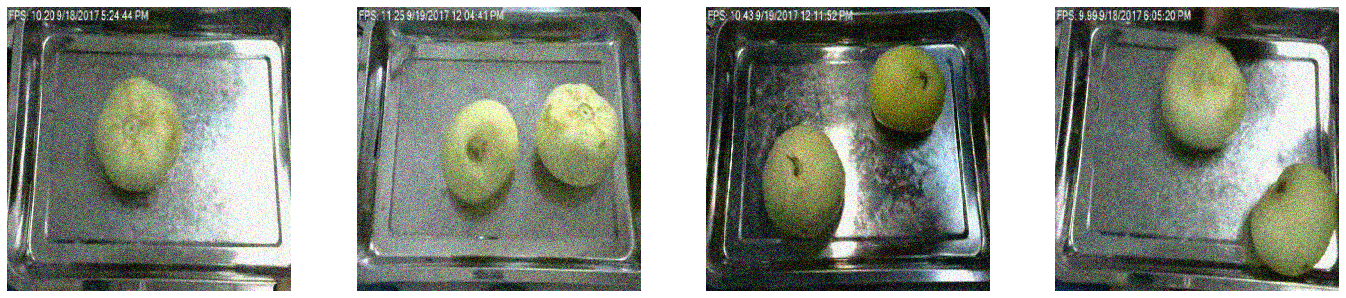

In [41]:
# show image
plt.figure(figsize=(24, 24))
for i in range(4):
    plt.subplot(4, 4, i+1)
    #plt.imshow(x_data[i][..., 0], cmap='gray')
    plt.imshow(traindata[i])
    plt.axis('off')
plt.show()

y_data = load_img(x_data_fulllist)

x_data_255=x_data*255

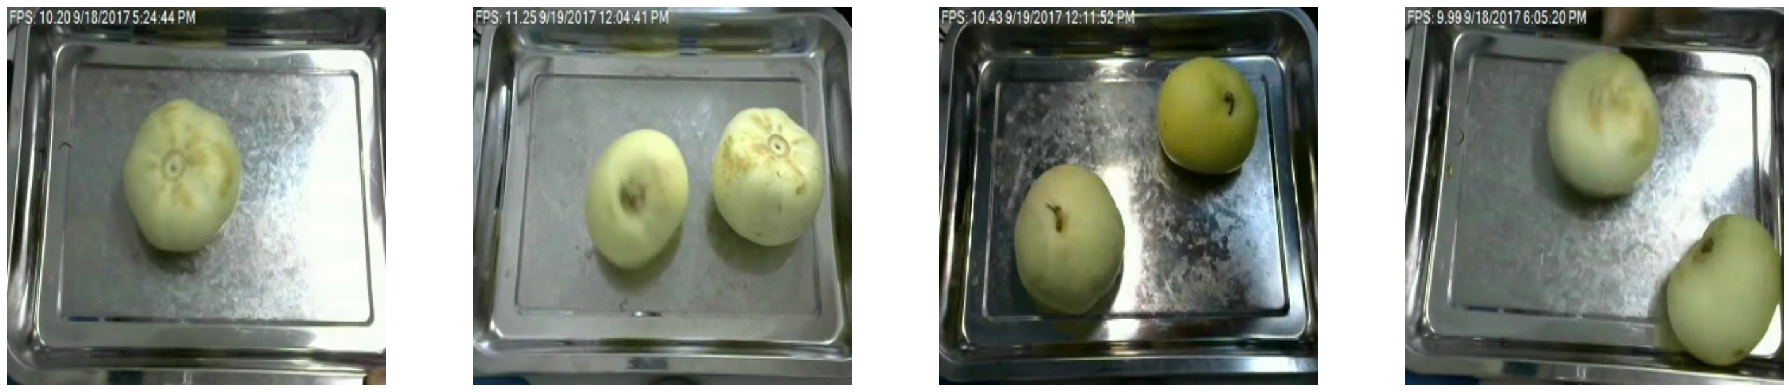

In [42]:
# show image
plt.figure(figsize=(32, 32))
for i in range(4):
    plt.subplot(4, 4, i+1)
    plt.imshow(vailddata[i])
    plt.axis('off')
plt.show()

#轉成array才可train
traindata=np.array(x_data)
vailddata=np.array(y_data)

traindata = cv2.normalize(np.array(x_data).astype('float'), None, 0, 1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8UC3)
vailddata = cv2.normalize(np.array(y_data).astype('float'), None, 0, 1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8UC3)


In [43]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(traindata, vailddata,
                                                    test_size=0.1,
                                                    random_state=10
                                                    )

In [44]:
x_train.shape

(1870, 600, 600, 3)

In [45]:
y_test.shape

(208, 600, 600, 3)

In [46]:
del traindata
del vailddata

# 準備建模型

In [12]:
def call_list_fun(models, model_name):
    model_dir = './Model/{}-logs'.format(model_name)
    if not os.path.exists(model_dir):
        os.makedirs(model_dir)

    logfiles = model_dir + '/{}-{}'.format(model_name,
                                           models.__class__.__name__)
    model_cbk = keras.callbacks.TensorBoard(log_dir=logfiles,
                                            histogram_freq=1)

    modelfiles = model_dir + '/{}-best-model.h5'.format(model_name)
    model_mckp = keras.callbacks.ModelCheckpoint(modelfiles,
                                                 monitor='val_accuracy',
                                                 save_best_only=True)

    earlystop = keras.callbacks.EarlyStopping(monitor='val_loss',
                                              patience=5,
                                              mode='auto',
                                              verbose=1)
    return [model_cbk, model_mckp, earlystop]

## 開始訓練模型 ( 參數設置)

In [13]:
#載入model
#model = load_model('./Model/autoencoder-500-0.88.h5')
#model = load_model('./Model/autoencoder-600-0.88.h5')
#model = load_model('./Model/autoencoder-2set-400-0.862.h5')
#odel = load_model('./Model/autoencoder-500-087.h5')
#model = load_model('./Model/autoencoder-400-0.85.h5')
#model = load_model('./Model/autoencoder-logs/autoencoder-best-model.h5')
model = load_model('./Model/autoencoder-2set-600-0.877.h5')

In [14]:
model_name='autoencoder'

In [56]:
input_img = Input(shape=(img_size, img_size,3))

In [73]:
 # encoder
h = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
h = MaxPooling2D((2, 2), padding='same')(h)

h = MaxPooling2D((2, 2), padding='same')(h)
h = MaxPooling2D((2, 2), padding='same')(h)
#h = MaxPooling2D((2, 2), padding='same')(h)


# decoder
h = Conv2D(32, (3, 3), activation='relu', padding='same')(h)
h = UpSampling2D((2, 2))(h)

h = UpSampling2D((2, 2))(h)
h = UpSampling2D((2, 2))(h)
#h = UpSampling2D((2, 2))(h)


decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(h)
        
model = Model(input_img, decoded)

In [15]:
#plot_model(model, to_file='ex_Model.png', show_shapes=True)
print(model.summary())

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 600, 600, 3)]     0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 600, 600, 48)      1344      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 300, 300, 48)      0         
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 150, 150, 48)      0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 75, 75, 48)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 75, 75, 48)        20784     
_________________________________________________________________
up_sampling2d_5 (UpSampling2 (None, 150, 150, 48)      0   

In [16]:
callbacks_list = call_list_fun(model, model_name)

In [17]:
learning_rate = 1e-4
optimizer = keras.optimizers.Adam(lr=learning_rate)
#optimizer = keras.optimizers.SGD(lr=learning_rate)
#optimizer = keras.optimizers.RMSprop(lr=learning_rate)
#optimizer = keras.optimizers.Adadelta(lr=learning_rate)
#optimizer = keras.optimizers.Nadam(lr=learning_rate)
#optimizer = keras.optimizers.Adadelta(lr=learning_rate)
#optimizer=tf.keras.optimizers.Adagrad(lr=learning_rate)
#num_step = x_train.shape[0] // batch_size + 1
#mode_loss='categorical_crossentropy'
#mode_loss='binary_crossentropy'
mode_loss='mean_squared_error'

In [18]:
# initiate optimizer
model.compile(loss=mode_loss,
                optimizer=optimizer,
                metrics=['accuracy']
                #metrics=['mae','accuracy']
             )

In [48]:
batchsize = 8
epoch = 200

In [49]:
# 訓練 Denoising AE ，輸入是加入雜訊的圖片，輸出是原始圖片
history=model.fit(x_train, y_train,
                    epochs=epoch,
                    batch_size=batchsize,
                    #shuffle=True,
                    validation_data=(x_test, y_test)
                  #,sample_weight=None
                  #,sample_weight_mode='temporal'
                    ,callbacks=callbacks_list
         )

Train on 1870 samples, validate on 208 samples
Epoch 1/200
1870/1870 [==============================] - 51s 27ms/sample - loss: 0.0011 - accuracy: 0.8977 - val_loss: 0.0011 - val_accuracy: 0.8931
Epoch 2/200
1870/1870 [==============================] - 50s 27ms/sample - loss: 0.0011 - accuracy: 0.8975 - val_loss: 0.0011 - val_accuracy: 0.8910
Epoch 3/200
1870/1870 [==============================] - 51s 27ms/sample - loss: 0.0011 - accuracy: 0.8976 - val_loss: 0.0011 - val_accuracy: 0.8924
Epoch 4/200
1870/1870 [==============================] - 50s 27ms/sample - loss: 0.0011 - accuracy: 0.8976 - val_loss: 0.0011 - val_accuracy: 0.8922
Epoch 5/200
1870/1870 [==============================] - 51s 27ms/sample - loss: 0.0011 - accuracy: 0.8977 - val_loss: 0.0011 - val_accuracy: 0.8893
Epoch 6/200
1870/1870 [==============================] - 50s 27ms/sample - loss: 0.0011 - accuracy: 0.8975 - val_loss: 0.0011 - val_accuracy: 0.8891
Epoch 7/200
1870/1870 [==============================] - 51

KeyboardInterrupt: 

## 訓練結果視覺化

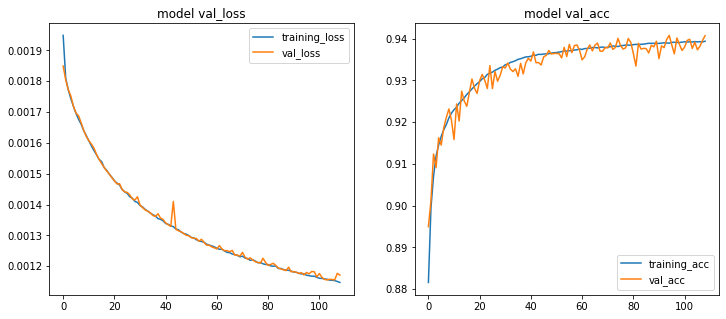

In [21]:
train_history = ['loss', 'val_loss', 'accuracy', 'val_accuracy']
name_history = ['training_loss', 'val_loss', 'training_acc', 'val_acc']

plt.figure(figsize=(12, 5))
for eachx, eachy, i in zip(train_history, name_history, range(4)):
    if i % 2 == 0:
        plt.subplot(1, 2, i//2+1)
    l_x = len(history.history[eachx])
    plt.plot(np.arange(l_x), history.history[eachx], label=eachy)
    plt.legend(loc='best')
    plt.title('model '+eachy)
plt.show()

In [22]:
#驗證資料
y_pred = model.evaluate(x_test, y_test, verbose=2)

32/1 - 11s


ResourceExhaustedError:  OOM when allocating tensor with shape[32,48,600,600] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[{{node model_3/conv2d_8/Conv2D-0-TransposeNHWCToNCHW-LayoutOptimizer}}]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info.
 [Op:__inference_distributed_function_3261]

Function call stack:
distributed_function


#載入測試資料

In [23]:
#資料讀入及前處理
test_data_path = "./data/testing"
test_data_fulllist = []
for roots, dirs, files in os.walk(test_data_path):
    #print(roots)
    #if dirs == []:
        #print(dirs)
        #files.sort() #對讀取的路徑進行排序
        for each in files: 
            #print(files)
            if each.find('check') == -1:
                test_data_fulllist.append(os.path.join(roots, each))  

In [24]:
def load_img(data_list):
    data_img = []
    for each in tqdm(data_list):
        img = plt.imread(each)
        img = cv2.resize(img, (img_size, img_size),cv2.INTER_AREA)
        data_img.append(img)
    return np.array(data_img)

In [25]:
test_data = load_img(test_data_fulllist)

100%|██████████| 40/40 [00:00<00:00, 70.01it/s]


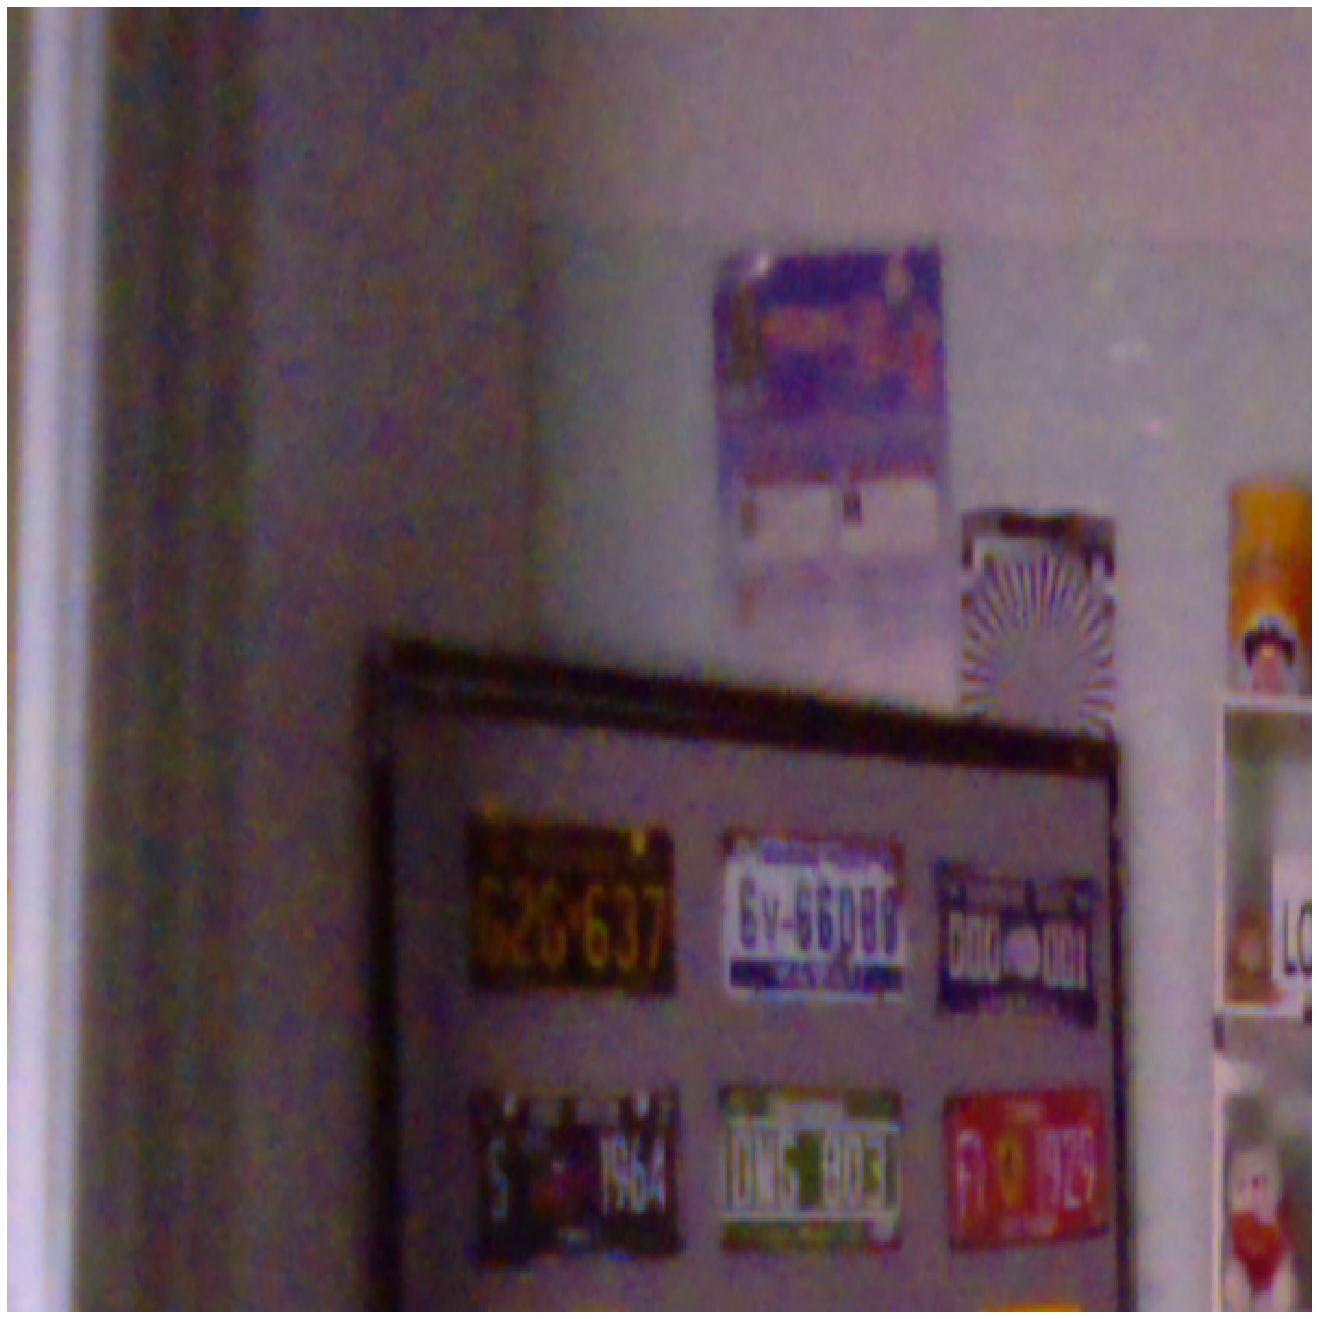

In [28]:
# show image
plt.figure(figsize=(24, 24))
for i in range(2):
    #plt.subplot(4, 4, i+1)
    #plt.imshow(x_data[i][..., 0], cmap='gray')
    plt.imshow(test_data[i])
    plt.axis('off')
plt.show()

testdata=np.array(test_data)

testdata = cv2.normalize(np.array(test_data), None, 0, 255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8UC3)

In [30]:
#預測資料
test_pred = model.predict(test_data)

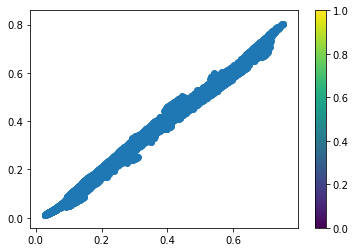

In [31]:
# plotting
plt.scatter(test_pred[:, 0], test_pred[:, 1])
plt.colorbar()
plt.show()

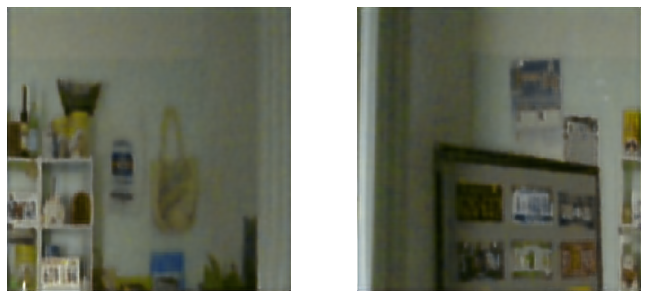

In [34]:
# show image
plt.figure(figsize=(24, 24))
for i in range(2):
    plt.subplot(4, 4, i+1)
    plt.imshow(test_pred[i])
    plt.axis('off')
plt.show()